In [3]:
# Nagłowki, można ignorować

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
import IPython.html.widgets as widgets
from IPython.html.widgets import fixed
from IPython.display import display

import warnings
warnings.simplefilter("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.display import display, Math, Latex

# Introduction to Neural Networks

## Prolog 1: Linear regression

In [5]:
# Wczytywanie pliku za pomocą csv.reader

import csv
reader = csv.reader(open("ex1data1.txt"), delimiter=",")

x = list()
y = list()
for xi, yi in reader:
    x.append(float(xi))
    y.append(float(yi)) 
    
print("x = ", x[:10])
print("y = ", y[:10])

x =  [6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862, 5.0546]
y =  [17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12.0, 6.5987, 3.8166]


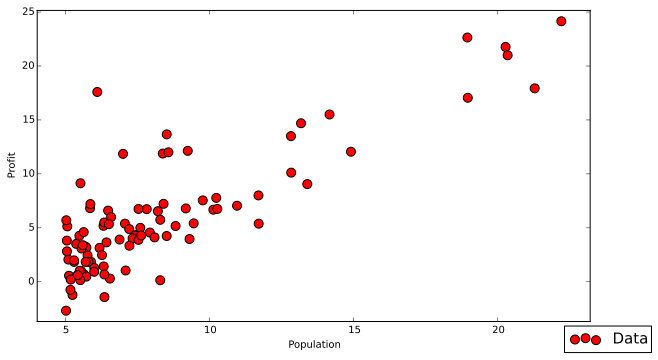

In [7]:
# Funkcje rysujące wykres kropkowy oraz prostą regresyjną

def regdots(x, y):    
    fig = pl.figure(figsize=(16*.6,9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter(x, y, c='r', s=80, label="Data")
    
    ax.set_xlabel("Population")
    ax.set_ylabel("Profit")
    ax.margins(.05,.05)
    pl.ylim(min(y)-1, max(y)+1)
    pl.xlim(min(x)-1, max(x)+1)
    return fig

def legend(fig):
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, fontsize='15', loc='lower right')

# Funkcja fun jest argumentem
def regline(fig, fun, theta, x):
    ax = fig.axes[0]
    x0, x1 = min(x), max(x)
    X = [x0, x1]
    Y = [fun(theta, x) for x in X]
    ax.plot(X, Y, linewidth='2', 
            label=(r'$y=%.2f+%.2f x$' % (theta[0], theta[1])))

fig = regdots(x,y)
legend(fig)

$$
\begin{array}{lclc}
\text{Parameters:} & \theta = \left[\begin{array}{c}\theta_0\\ \theta_1\end{array}\right] & 
\text{Model:} & h_{\theta}(x) = \theta_0 + \theta_1 x
\end{array}
$$

In [8]:
# A simple line, univariate function

def h(theta, x):
    return theta[0] + theta[1]*x

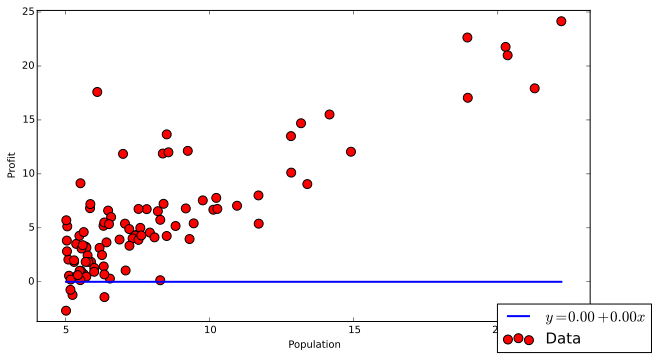

In [10]:
# Funkcje do obsługi interakcji, można ignorować

def Slide1(x, y, fun, show, theta0, theta1):
    fig = regdots(x, y)
    if(show):
        regline(fig, fun, [theta0, theta1], x)
    legend(fig)

toggleButton1 = widgets.ToggleButton(value=False, width=100)
sliderTheta01 = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0, 
                                          description=r'theta0', width=300)
sliderTheta11 = widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, 
                                          description=r'theta1', width=300)
widgets.interactive(Slide1, x=fixed(x), y=fixed(y), fun=fixed(h), 
                    show=toggleButton1, theta0=sliderTheta01, 
                    theta1=sliderTheta11)
display(toggleButton1)
display(sliderTheta01)
display(sliderTheta11)

fig1 = regdots(x, y)
legend(fig1)

## How can this be done better?

## Optimization Criterion: The Cost Function $J(\theta)$

We try to find $\hat\theta$ such that the cost function $J(\theta)$ is minimal:

$$\theta = \left[\begin{array}{c} \theta_0 \\ \theta_1 \end{array}\right] \in \mathbb{R}^2 \quad J:\mathbb{R^2} \rightarrow \mathbb{R}$$

$$ \hat\theta = \underset{{\theta \in \mathbb{R}^{2}}}{\operatorname{arg\,min}}\; J(\theta)$$

## Mean Square Error

$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{2m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2  \\
& = & \dfrac{1}{2m} \displaystyle \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^{(i)}  - y^{(i)}\right)^2
\end{array} $$

where $m$ is the number of data points in the training set.

In [31]:
def J(h, theta, x, y):
    m = len(y)
    return (1.0/(2*m) * sum((h(theta, x[i]) - y[i])**2 
                          for i in range(m)))

# Wpisz dowolne wartość jaki parametry theta, np. ustalone wczesniej
display(Math(r"\Large J(\theta) = %.4f" % J(h,[0, 0],x,y)))

<IPython.core.display.Math object>

##Płaszczyzna błędu $J(\theta)$

* Widzimy, że $J(\theta)$ tworzy funkcję wypukłą. 
* Punkt przecięcia z czerwoną linią to minimum.

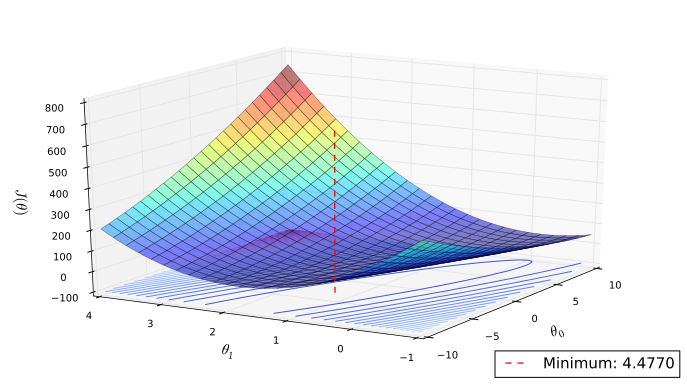

In [16]:
# Funkcje pomocnicze do rysowania płaszczyzny, można ignorować

from mpl_toolkits.mplot3d import Axes3D
import pylab

%matplotlib inline

def errorSurface(x, y):
    pX = np.arange(-10,10.1,0.1)
    pY = np.arange(-1,4.1,0.1)
    pX, pY = np.meshgrid(pX, pY)
    
    pZ = np.matrix([[J(h,[t0, t1], x, y) 
                     for t0, t1 in zip(xRow, yRow)] 
                    for xRow, yRow in zip(pX, pY)])
    
    fig = pl.figure(figsize=(16*.6,9*.6))
    ax = fig.add_subplot(111, projection='3d')
    pl.subplots_adjust(left=0.0, right=1, bottom=0.0, top=1)
    ax.plot_surface(pX ,pY, pZ, rstride=2, cstride=8, linewidth=0.5,
                    alpha=0.5, cmap='jet', zorder=0,
                    label=r"$J(\theta)$")
    ax.view_init(elev=20., azim=-150)

    ax.set_xlim3d(-10, 10);
    ax.set_ylim3d(-1, 4);
    ax.set_zlim3d(-100, 800);

    N = range(0,800,20)
    pl.contour(pX,pY,pZ, N,zdir='z',offset=-100, cmap='coolwarm', alpha=1)
    
    ax.plot([-3.89578088] * 3,
            [ 1.19303364] * 3,
            [-100, 4.47697137598, 700], 
            color='red', alpha=1, linewidth=1.3, zorder=100, 
            linestyle='dashed',
           label="Minimum: 4.4770")

    ax.set_zlabel(r"$J(\theta)$", fontsize="15")
    ax.set_xlabel(r"$\theta_0$", fontsize="15")
    ax.set_ylabel(r"$\theta_1$", fontsize="15")
    ax.margins(0,0,0)
    fig.tight_layout()
    return fig, ax;

def LatexMatrix(matrix):
    ltx = r'\left[\begin{array}'
    m, n = matrix.shape
    ltx += '{' + ("r" * n) + '}'
    for i in range(m):
        ltx += r" & ".join([('%.4f' % j.item()) for j in matrix[i]]) + r" \\ "
    ltx += r'\end{array}\right]'
    return ltx

fig, ax = errorSurface(x,y);
legend(fig);

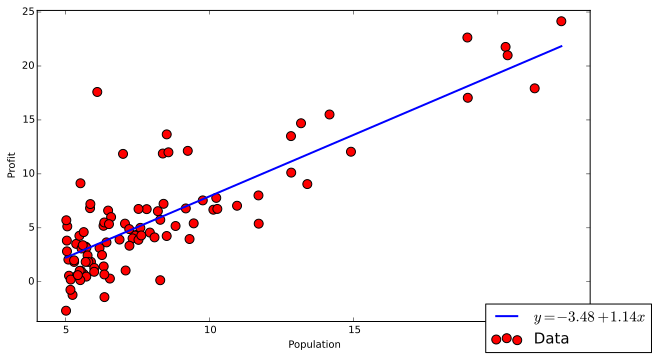

In [19]:
# funkcje do rysowania i interakcji, można ignorować

def Slide2(x, y, fun, show, theta0, theta1, Jout):
    fig = regdots(x, y)
    if(show):
        regline(fig, fun, [theta0, theta1], x)
        Jout.value = '%.4f' % J(fun, [theta0, theta1], x, y)
    legend(fig)

toggleButton2 = widgets.ToggleButton(value=False, width=100)
sliderTheta02 = widgets.FloatSlider(min=-10, max=10, step=0.01, value=0, 
                                          description=r'theta0', width=300)
sliderTheta12 = widgets.FloatSlider(min=-5, max=5, step=0.01, value=0, 
                                          description=r'theta1', width=300)
text2 = widgets.FloatText(value=0, description=r'J:', width=100)

widgets.interactive(Slide2, x=fixed(x), y=fixed(y), fun=fixed(h), 
                    show=toggleButton2, theta0=sliderTheta02, 
                    theta1=sliderTheta12, Jout=fixed(text2));

display(toggleButton2)
display(sliderTheta02)
display(sliderTheta12)
display(text2)

fig2 = regdots(x, y)
legend(fig2)

## So, how do we find $ \hat\theta = \underset{{\theta \in \mathbb{R}^{2}}}{\operatorname{arg\,min}} \; J(\theta)$ computionally?

## Method 1: Normal Matrix

Linear regression has a closed form formula for calculating the optimal $\theta$ that minimizes $J(\theta)$: 

$$\theta = (X^TX)^{-1}X^T \vec y$$

where 

$$X
= \left[\begin{array}{cccc}
1 & x_1^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots\\
1 & x_1^{(m)} & \cdots & x_n^{(m)} \\
\end{array}\right]$$

In [53]:
# Macierz normalna, implementacja za pomocą numpy (było na ćwiczeniach 1)

def norm(X,y):
    return (X.T*X)**-1*X.T*y

data = np.loadtxt("ex1data1.txt", delimiter=",")
m, np1 = data.shape # np1 : n plus 1
n = np1 - 1
Xn = data[:,0:n].reshape(m,n)

# Dodaj kolumne jedynek do macierzy
XMx = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m,np1)
yMx = np.matrix(data[:,1]).reshape(m,1)

thetaNorm = norm(XMx, yMx)
display(Math(r'\Large \theta = ' + LatexMatrix(thetaNorm)))

<IPython.core.display.Math object>

## Method 2: Gradient Descent

## Metoda Gradientu Prostego
### Reguła aktualizacji parametrów $\theta_j$

$$\theta_j := \theta_j - \alpha \dfrac{\partial}{\partial\theta_j}J(\theta) \textrm{ dla każdego j}$$

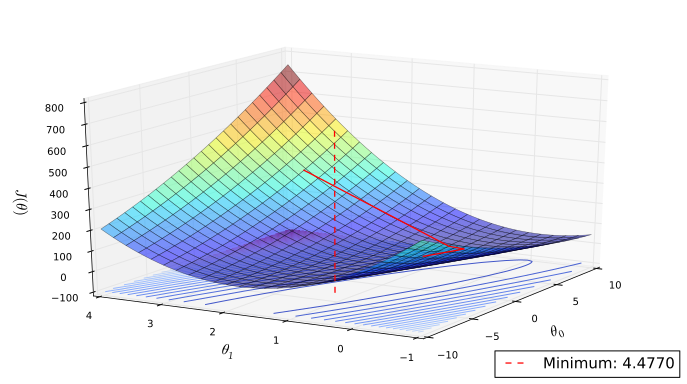

In [33]:
# Rysowanie, ignorować

from IPython.html.widgets import interact, fixed, FloatSliderWidget

# Implementacja tylko dla wyswietlania grafiki, ingnorowac.
def GD2(h, fJ, theta, x, y, alpha=0.1, eps=10**-3, steps=None):
    errorCurr = fJ(h, theta, x, y)
    errors = [[errorCurr, theta]] # Logujemy poziom błędu

    m = len(y)
    while True:
        # Równoczesna aktualizacja za pomocą zmiennej tymczasowej
        thetaPrime = [0, 0]
        thetaPrime[0] = theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i] 
                                                 for i in range(m)) 
        thetaPrime[1] = theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i] 
                                                 for i in range(m))
        theta = thetaPrime
        
        # Nieistotne
        if steps != None and len(errors) >= steps:
            break
        
        # Kryterium stopu
        errorCurr, errorPrev = fJ(h, theta, x, y), errorCurr
        if abs(errorPrev - errorCurr) <= eps:
            break
        errors.append([errorCurr, theta[:]]) # Logujemy poziom błędu
        
    return theta, errors

thetaBest, errors = GD2(h, J, [0,0], x, y, alpha=0.01, eps=0.0)

display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(thetaBest).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % errors[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(errors)))

def addError(ax, errors, color = 'r'):
    eX = [theta[0] for j, theta in errors]
    eY = [theta[1] for j, theta in errors]
    eZ = [j for j, theta in errors]
    ax.plot(eX, eY, eZ, color='red', alpha=1, linewidth=1.3, zorder=100)

def Step(theta, x, y, step, alpha):
    fig, ax = errorSurface(x,y)
    errors = GD2(h, J, theta, x, y, alpha=alpha, eps=0.001, steps=step)[1]
    addError(ax, errors)
    legend(fig)

sliderStep = FloatSliderWidget(min=0, max=200, step=1, 
                               value=5, description=u"step")
sliderAlpha = FloatSliderWidget(min=0.001, max=0.03, step=0.01, 
                                value=0.001, description="alpha")

thetaStart = [5,3] 
interact(Step, theta=fixed(thetaStart), x=fixed(x), y=fixed(y), 
         step=sliderStep, alpha=sliderAlpha);

## Jak obliczyć $\dfrac{\partial}{\partial\theta_j}J(\theta)$?
$$\small
\begin{array}{rcl}
\dfrac{\partial}{\partial\theta_j} J(\theta) 
 & = & \dfrac{\partial}{\partial\theta_j} \dfrac{1}{2m} \displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2\\
 & = & 2 \cdot \dfrac{1}{2m} \displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot \dfrac{\partial}{\partial\theta_j} (h_\theta(x^{(i)}) - y^{(i)})\\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot \dfrac{\partial}{\partial\theta_j} \left(\displaystyle\sum_{i=0}^n \theta_ix_i^{(i)} - y^{(i)}\right)\\
 & = & \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\
\end{array}
$$

## Jeszcze raz reguła aktualizacji parametrów $\theta_j$

Dla regresji liniowej jednej zmiennej mamy model:

$$ h_\theta(x) = \theta_0 + \theta_1x $$

czyli powtarzamy aż do konwergencji ($\theta_1$ i $\theta_2$ należy aktualizować równocześnie):

$$
\begin{array}{rcl}
\theta_0 & := & \theta_0 - \alpha \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})\\ 
\theta_1 & := & \theta_1 - \alpha \dfrac{1}{m}\displaystyle\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x^{(i)}\\ 
\end{array}
$$

In [32]:
# Implementacja algorytmu gradient descent, wersja bez macierzy

def GD(h, fJ, theta, x, y, alpha=0.1, eps=10**-3):
    errorCurr = fJ(h, theta, x, y)
    errors = [[errorCurr, theta]] # Logujemy poziom błędu

    m = len(y)
    while True:
        # Równoczesna aktualizacja za pomocą zmiennej tymczasowej
        thetaPrime = [0, 0]
        thetaPrime[0] = theta[0] - alpha/float(m) * sum(h(theta, x[i]) - y[i] 
                                                 for i in range(m)) 
        thetaPrime[1] = theta[1] - alpha/float(m) * sum((h(theta, x[i]) - y[i]) * x[i] 
                                                 for i in range(m))
        theta = thetaPrime
        
        # Kryterium stopu
        errorCurr, errorPrev = fJ(h, theta, x, y), errorCurr
        if abs(errorPrev - errorCurr) <= eps:
            break
        errors.append([errorCurr, theta]) # Logujemy poziom błędu
    return theta, errors

thetaBest, errors = GD(h, J, [0,0], x, y, alpha=0.01, eps=0.000001)

#######################################################################
display(Math(r'\large\textrm{Wynik:}\quad \theta = ' + 
             LatexMatrix(np.matrix(thetaBest).reshape(2,1)) + 
            (r' \quad J(\theta) = %.4f' % errors[-1][0])  
            + r' \quad \textrm{po %d iteracjach}' % len(errors)))  

<IPython.core.display.Math object>

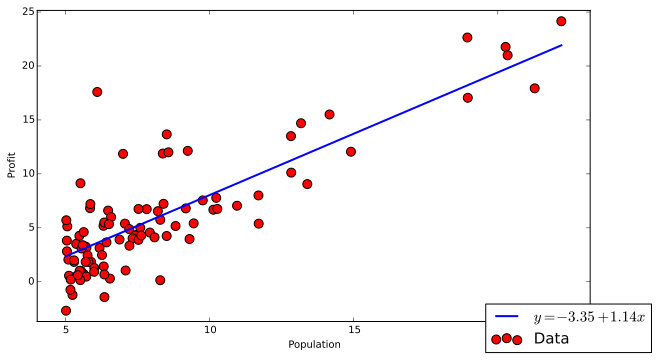

In [46]:
fig = regdots(x, y)
thetaBest, errors = GD(h, J, [0,0], x, y, alpha=0.01, eps=0.0001)
regline(fig, h, thetaBest, x)
legend(fig)